# SQLite Tutorial

在Jyputer Notebook中使用SQL，需要载入ipython-sql [extension](https://github.com/catherinedevlin/ipython-sql)

In [1]:
%load_ext sql

SQLite是Python缺省安装的数据库系统。与其他数据库系统不同，SQLite数据库可以从文件中载入，其中dataset.db在当前目录下，也可以使用空的内存数据库，即Kernel结束后不保存到文件。

``%sql sqlite:///dataset.db``

``%sql sqlite://``

在Jyputer Notebook中，%sql标记**当前行**为SQL命令语句，%%sql标记**当前行及下面多行**为SQL命令语句。 

In [2]:
%sql sqlite://

创建课程修读关系SC(Sno, Cno, Grade)，并插入相关数据

In [5]:
%%sql
drop table if exists SC;
create table SC (Sno int, Cno int, Grade int);
insert into SC values(30001, 101, 83);
insert into SC values(30002, 101, 92);
insert into SC values(30003, 101, 74);
insert into SC values(30004, 101, 86);
insert into SC values(30005, 101, 62);
insert into SC values(30001, 102, 79);
insert into SC values(30003, 102, 61);
insert into SC values(30005, 102, NULL);
insert into SC values(30001, 103, 87);

 * sqlite://
Done.
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [6]:
%sql select * from SC;

 * sqlite://
Done.


Sno,Cno,Grade
30001,101,83
30002,101,92
30003,101,74
30004,101,86
30005,101,62
30001,102,79
30003,102,61
30005,102,None
30001,103,87


In [7]:
%sql select count(*) from SC where Cno = 101

 * sqlite://
Done.


count(*)
5


In [8]:
%%sql
select Cno, max(Grade)
from SC
group by Cno

 * sqlite://
Done.


Cno,max(Grade)
101,92
102,79
103,87


查询结果可以保存到Python的变量中

In [9]:
result = %sql select * from SC where Cno = 101

 * sqlite://
Done.


In [10]:
result.keys

RMKeyView(['Sno', 'Cno', 'Grade'])

通过len获得结果数量

In [11]:
len(result)

5

查询结果可以通过索引下标访问，每个属性可以也通过列名访问

In [12]:
print(result[0])
print(result[0][2])
print(result[0].Grade)

(30001, 101, 83)
83
83


In [13]:
for row in result:
    print(row[0], row[2])

30001 83
30002 92
30003 74
30004 86
30005 62


Python的变量作为查询语句的参数

In [14]:
no = 30002
Cno = 103
%sql insert into SC values(:no, :Cno, 94);

 * sqlite://
1 rows affected.


[]

In [15]:
Cno = [101, 102, 103]
template = 'select * from SC where Cno = %s'
for no in Cno:
    query = template % (no)
    result = %sql $query
    print(result)

 * sqlite://
Done.
+-------+-----+-------+
|  Sno  | Cno | Grade |
+-------+-----+-------+
| 30001 | 101 |   83  |
| 30002 | 101 |   92  |
| 30003 | 101 |   74  |
| 30004 | 101 |   86  |
| 30005 | 101 |   62  |
+-------+-----+-------+
 * sqlite://
Done.
+-------+-----+-------+
|  Sno  | Cno | Grade |
+-------+-----+-------+
| 30001 | 102 |   79  |
| 30003 | 102 |   61  |
| 30005 | 102 |  None |
+-------+-----+-------+
 * sqlite://
Done.
+-------+-----+-------+
|  Sno  | Cno | Grade |
+-------+-----+-------+
| 30001 | 103 |   87  |
| 30002 | 103 |   94  |
+-------+-----+-------+


In [16]:
query = """
select * 
from SC
where Cno = 102
"""
%sql $query

 * sqlite://
Done.


Sno,Cno,Grade
30001,102,79
30003,102,61
30005,102,None


%time计算当前行的代码运行时间

%%time计算当前单元的代码运行时间

In [17]:
%time %sql select * from SC

 * sqlite://
Done.
CPU times: user 3.78 ms, sys: 475 µs, total: 4.26 ms
Wall time: 3.06 ms


Sno,Cno,Grade
30001,101,83
30002,101,92
30003,101,74
30004,101,86
30005,101,62
30001,102,79
30003,102,61
30005,102,None
30001,103,87
30002,103,94


In [18]:
%%time
%sql select * from SC

 * sqlite://
Done.
CPU times: user 3.6 ms, sys: 462 µs, total: 4.06 ms
Wall time: 2.6 ms


Sno,Cno,Grade
30001,101,83
30002,101,92
30003,101,74
30004,101,86
30005,101,62
30001,102,79
30003,102,61
30005,102,None
30001,103,87
30002,103,94


matplotlib可以通过.plot()，.pie()，.bar()对SQL语句查询结果进行可视化，例如

 * sqlite://
Done.


([<matplotlib.patches.Wedge at 0x7f07a071a580>,
 [Text(6.735557395310444e-17, 1.1, '101'),
  Text(-0.6465637441936395, -0.8899187180267095, '102'),
  Text(0.8899187482945414, -0.6465637025335375, '103')])

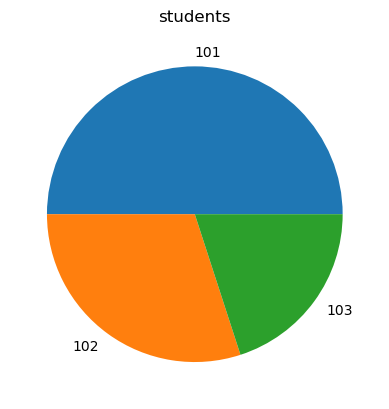

In [19]:
result = %sql select Cno, count(*) as students from SC group by Cno
%matplotlib inline
result.pie()